<a href="https://colab.research.google.com/github/cajohare/HowToMakeAPlot/blob/main/code/ComplicatedPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to deal with very complicated plots

Here is an exmaple of an overly-complicated plot

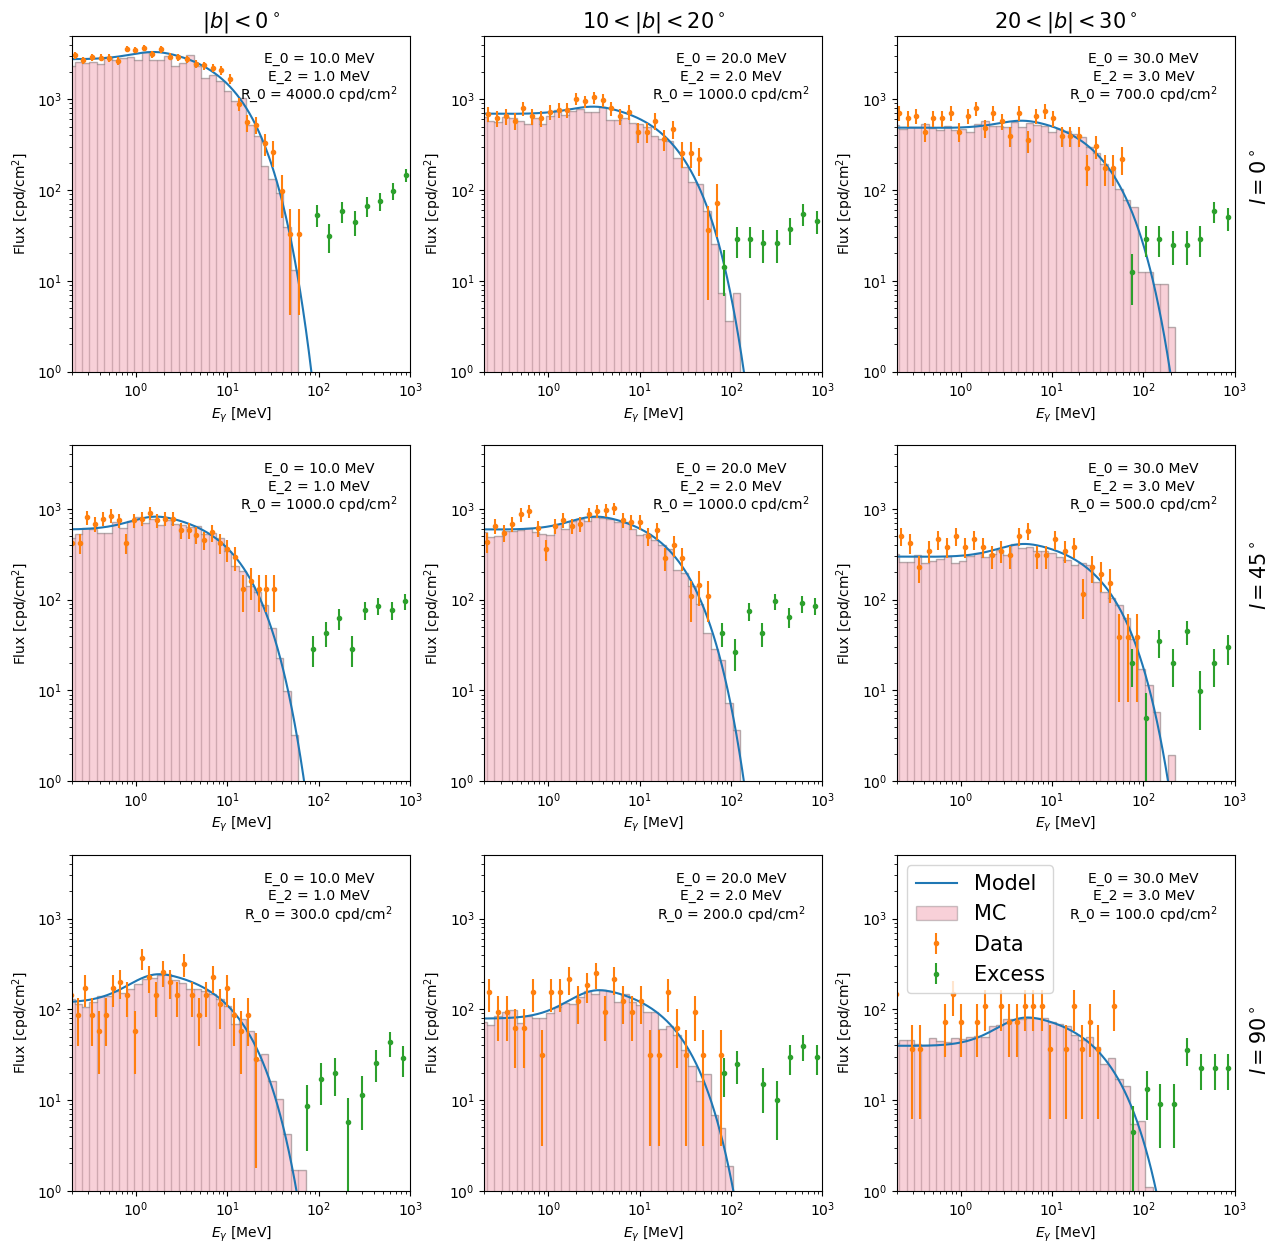

In [271]:
from numpy import *
import matplotlib.pyplot as plt

plt.style.use('default')

fig, axs = plt.subplots(3, 3)
fig.set_size_inches(15,15)
fig.subplots_adjust(hspace=0.22, wspace=0.22)


# Create data for plot
Efine = logspace(-1,2.5,1000)
flux = lambda E,R0,E0,E02,d : R0*(exp(-E/E0) - d*exp(-E**2/E02**2))

E0 = array([10.0,20.0,30.0])
E02 = array([1.0,2.0,3.0])
R0 = array([[4e3,1e3,7e2],[1e3,1e3,5e2],[3e2,2e2,1e2]])
d = array([0.3,0.4,0.6])

R_XS = array([[4e1,3e1,2e1],[3e1,3e1,1e1],[2e1,1e1,1e1]])
E_XS = array([[1e2,2e2,0.8e2],[1e2,0.8e2,1e2],[2e2,1e2,1e2]])
Efine_XS = logspace(1.8,3.3,100)

bins = logspace(-1,3,50)
MC_size = 5000

# Loop through subplots
for row in range(3):
    for col in range(3):

        # Plot model
        model = flux(Efine,R0[row,col],E0[col],E02[col],d[row])
        axs[row,col].plot(Efine,model,label='Model')

        # Plot monte-carlo histogram
        energies_MC = Efine[random.choice(arange(size(Efine)),p=model/sum(model),size=MC_size)]
        h,_ = histogram(energies_MC,bins=bins)
        h = amax(model)*h/amax(h)
        axs[row,col].bar(bins[0:-1],h,width=(bins[1:]-bins[0:-1]),align='edge',alpha=0.1,linewidth=1,edgecolor='k',fill=False)
        axs[row,col].fill_between(bins[0:-1],h,step='post',alpha=0.2,color='crimson',label='MC',edgecolor='k')

        # Plot measurement
        meas_size = int(2000*R0[row,col]/4e3)
        energies_meas = Efine[random.choice(arange(size(Efine)),p=model/sum(model),size=meas_size)]
        F,log_bin_edges = histogram(log(energies_meas),30)
        F = F/sum(F)*sum(h)
        axs[row,col].errorbar(exp((log_bin_edges[1:]+log_bin_edges[0:-1])/2),F,yerr=5*sqrt(F),fmt='.',label='Data')

        # Plot excess
        XS_size = int(50*R_XS[row,col]/1e1)
        model_XS = R_XS[row,col]*(Efine_XS/E_XS[row,col])**0.5
        energies_XS = Efine_XS[random.choice(arange(size(Efine_XS)),p=model_XS/sum(model_XS),size=XS_size)]
        F,log_bin_edges = histogram(log(energies_XS))
        F = F/amax(F)*amax(model_XS)
        axs[row,col].errorbar(exp((log_bin_edges[1:]+log_bin_edges[0:-1])/2),F,yerr=2*sqrt(F),fmt='.',label='Excess')

        # Adding text labels
        axs[row,col].text(0.1e3,2.5e3,r'E_0 = %.1f MeV'%(E0[col]),ha='center')
        axs[row,col].text(0.1e3,1.6e3,r'E_2 = %.1f MeV'%(E02[col]),ha='center')
        axs[row,col].text(0.1e3,1.0e3,r'R_0 = %.1f cpd/cm$^2$'%(R0[row,col]),ha='center')

        # Fixing axis
        axs[row,col].set_yscale('log')
        axs[row,col].set_xscale('log')
        axs[row,col].set_ylim([1e0,5e3])
        axs[row,col].set_xlim([2e-1,1e3])
        axs[row,col].set_xlabel('$E_\gamma$ [MeV]')
        axs[row,col].set_ylabel('Flux [cpd/cm$^2$]')

axs[2,2].legend(fontsize=15,loc='upper left')

# Top labels
axs[0,0].set_title('$|b| < 0^\circ$',fontsize=15)
axs[0,1].set_title('$10 < |b| < 20^\circ$',fontsize=15)
axs[0,2].set_title('$20 < |b| < 30^\circ$',fontsize=15)

# Column labels
plt.gcf().text(0.91,0.77,'$l = 0^\circ$',rotation=90,fontsize=15)
plt.gcf().text(0.91,0.50,'$l = 45^\circ$',rotation=90,fontsize=15)
plt.gcf().text(0.91,0.19,'$l = 90^\circ$',rotation=90,fontsize=15)

plt.savefig('../plots/ComplicatedPlot_Bad.pdf',transparent=False,bbox_inches='tight')

# How to make it better?

Step 1: Avoid making complicated plots. Why does your plot need to be so complicated? Are you trying to impress someone? Because you won’t - you will just confuse or annoy them. Simplify. Draw out the message you are trying to say and just show that.
That said, sometimes plots in papers do get complicated. In those cases, you still want to maximise the time people spend thinking about your message rather than just figuring out your plot’s internal logic. Use pre-attentive attributes to express multiple layers of information that the reader can appreciate in stages. Use labels liberally. Do not force the reader to play tennis between the figure and the caption

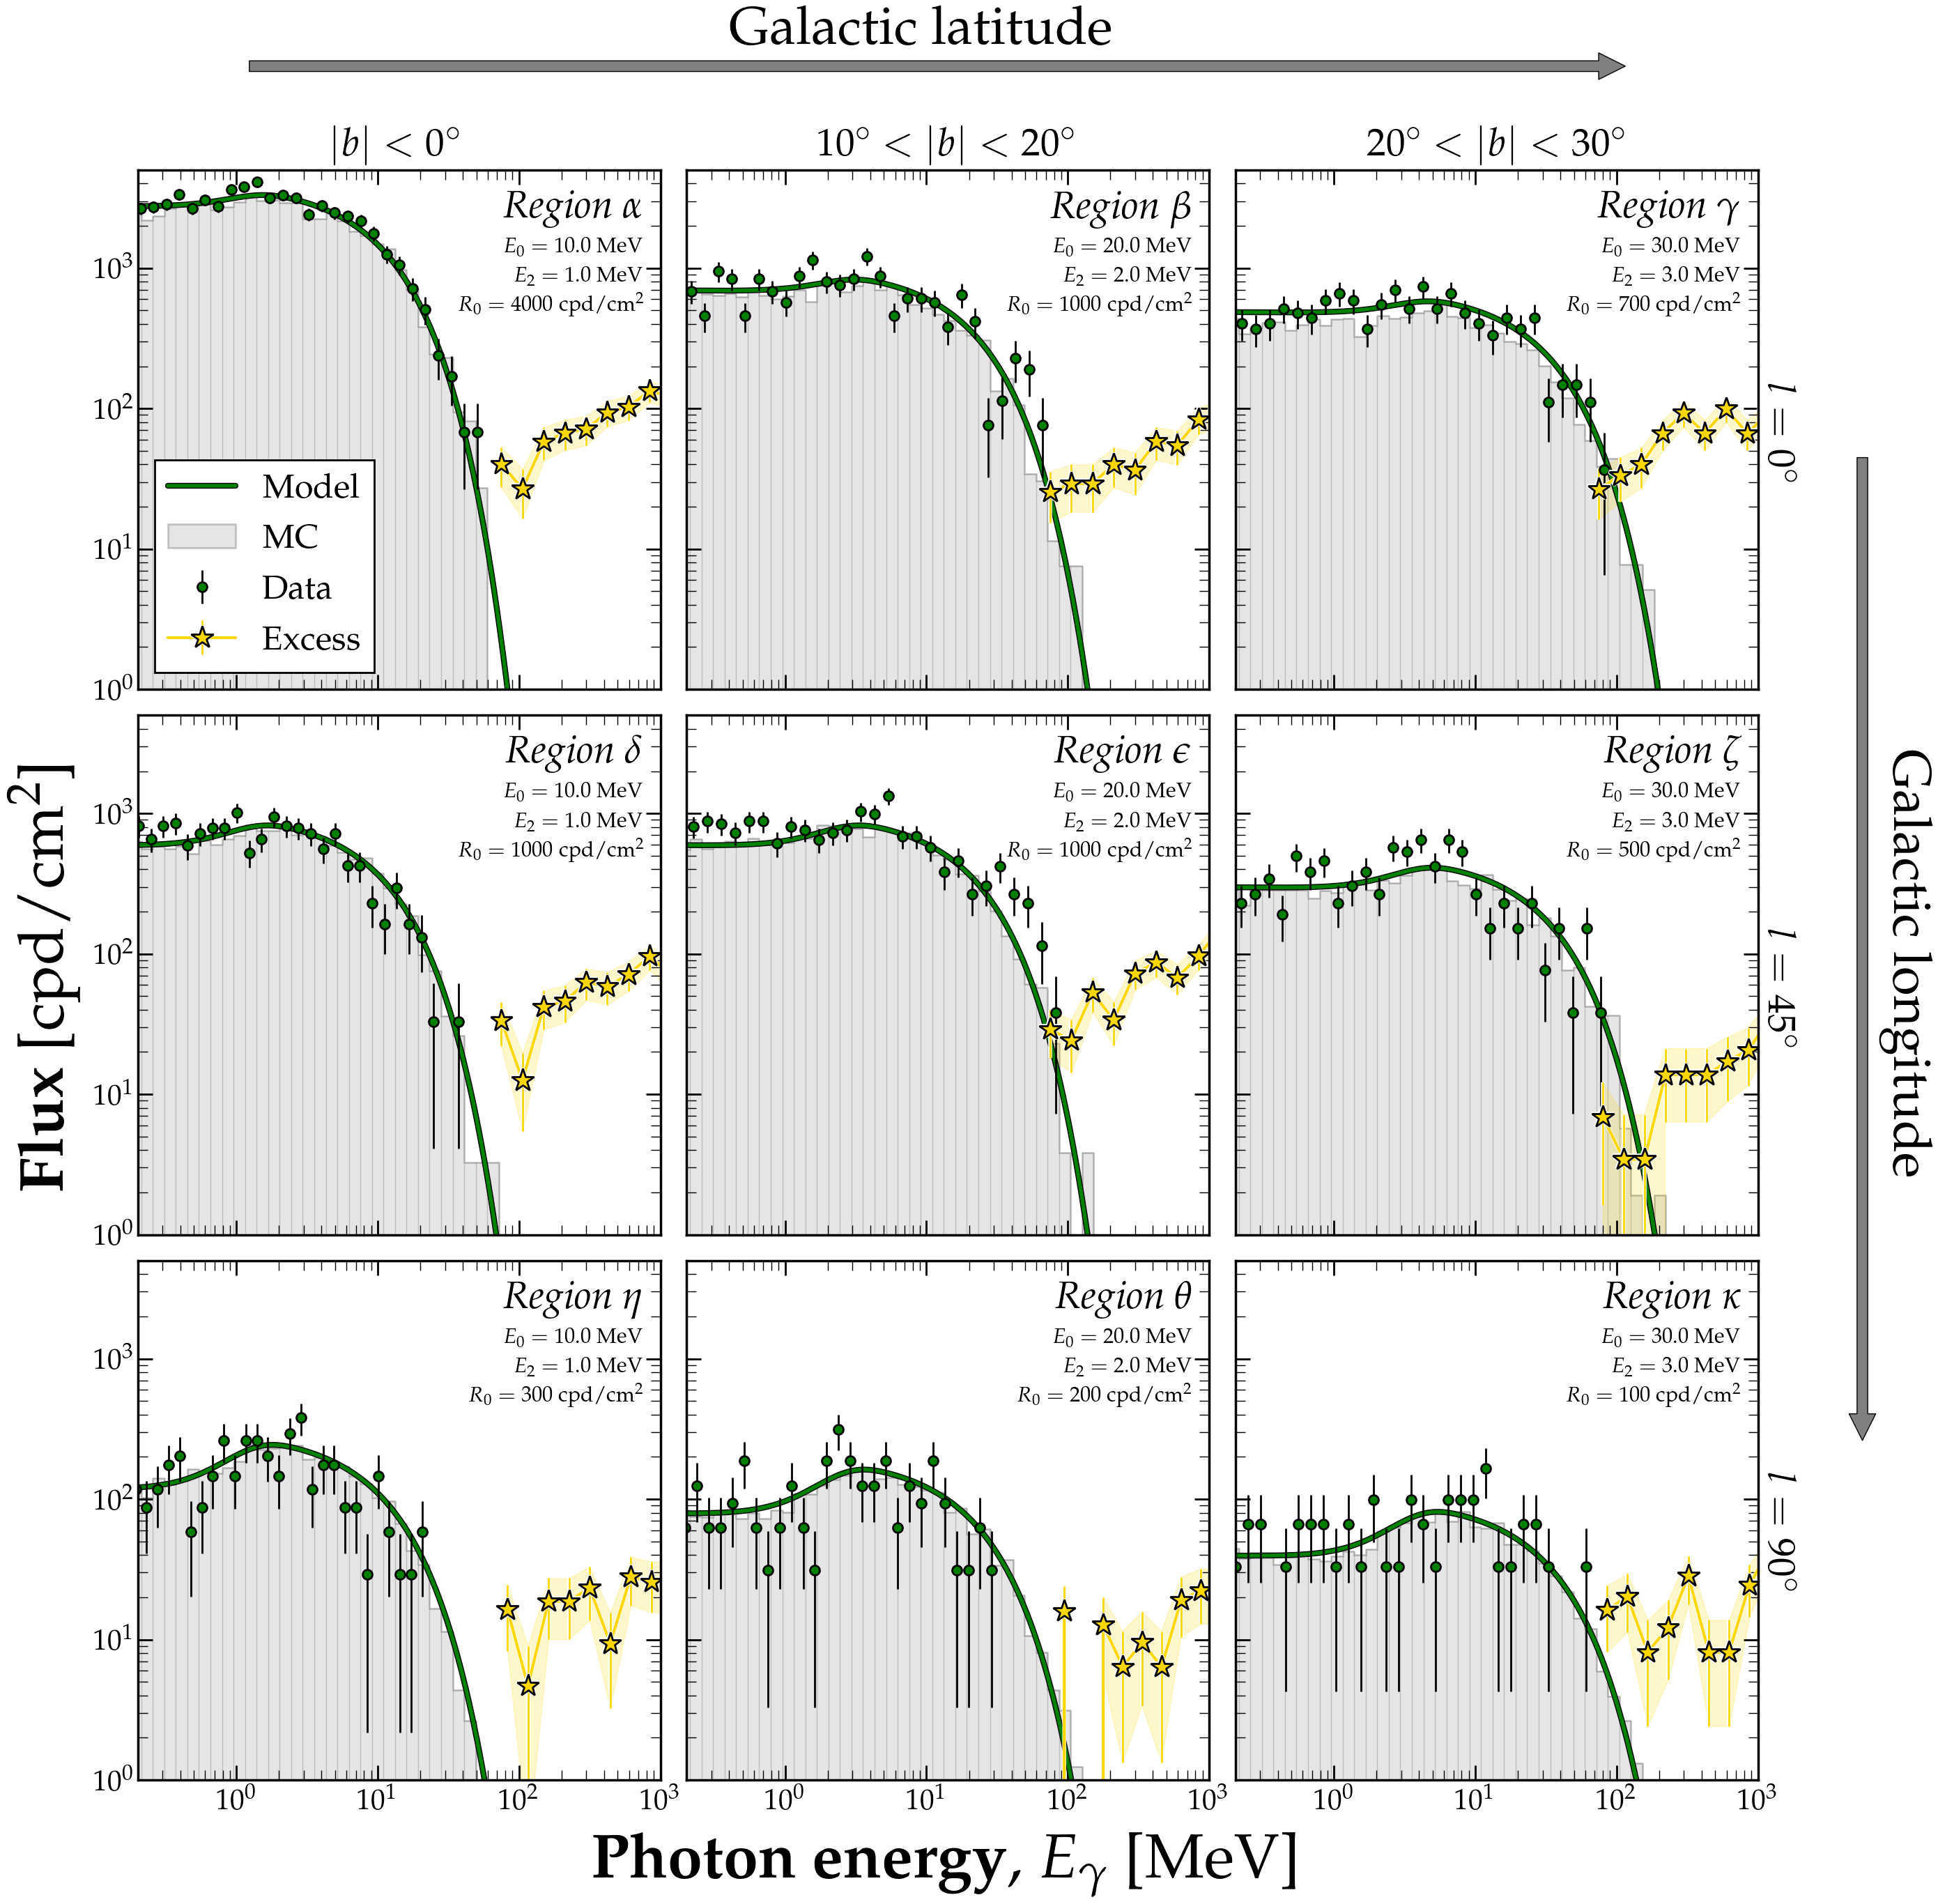

In [272]:
import matplotlib.patheffects as pe

plt.style.use('sty.mplstyle')

fig, axs = plt.subplots(3, 3)
fig.set_size_inches(30,30)
fig.subplots_adjust(hspace=0.05, wspace=0.05)


lab = array([[r'$\alpha$',r'$\beta$',r'$\gamma$'],[r'$\delta$',r'$\epsilon$',r'$\zeta$'],[r'$\eta$',r'$\theta$',r'$\kappa$']])

# Loop through subplots
for row in range(3):
    for col in range(3):
        # Plot model
        model = flux(Efine,R0[row,col],E0[col],E02[col],d[row])
        axs[row,col].plot(Efine,model,lw=4,label='Model',color='green',path_effects=[pe.Stroke(linewidth=6, foreground='k'), pe.Normal()])

        # Plot Monte carlo data
        energies_MC = Efine[random.choice(arange(size(Efine)),p=model/sum(model),size=MC_size)]
        h,_ = histogram(energies_MC,bins=bins)
        h = amax(model)*h/amax(h)
        axs[row,col].bar(bins[0:-1],h,width=(bins[1:]-bins[0:-1]),align='edge',alpha=0.1,linewidth=1,edgecolor='k',fill=False)
        axs[row,col].fill_between(bins[0:-1],h,step='post',alpha=0.2,color='gray',label='MC',edgecolor='k',lw=2)

        # Plot measurement
        meas_size = int(2000*R0[row,col]/4e3)
        energies_meas = Efine[random.choice(arange(size(Efine)),p=model/sum(model),size=meas_size)]
        F,log_bin_edges = histogram(log(energies_meas),30)
        F = F/sum(F)*sum(h)
        axs[row,col].errorbar(exp((log_bin_edges[1:]+log_bin_edges[0:-1])/2),F,yerr=5*sqrt(F),fmt='.',label='Data',color='k',elinewidth=2,markersize=20,mew=2,mec='k',mfc='green')

        # Plot excess
        XS_size = int(50*R_XS[row,col]/1e1)
        model_XS = R_XS[row,col]*(Efine_XS/E_XS[row,col])**0.5
        energies_XS = Efine_XS[random.choice(arange(size(Efine_XS)),p=model_XS/sum(model_XS),size=XS_size)]
        F,log_bin_edges = histogram(log(energies_XS))
        F = F/amax(F)*amax(model_XS)
        axs[row,col].fill_between(exp((log_bin_edges[1:]+log_bin_edges[0:-1])/2),F-2*sqrt(F),y2=F+2*sqrt(F),color='gold',alpha=0.2)
        axs[row,col].errorbar(exp((log_bin_edges[1:]+log_bin_edges[0:-1])/2),F,yerr=2*sqrt(F),\
                              label='Excess',color='gold',elinewidth=2,markersize=24,mew=2,mec='k',mfc='gold',marker='*',path_effects=[pe.Stroke(linewidth=4, foreground='w'), pe.Normal()])

        # Add labels
        axs[row,col].text(0.75e3,2.3e3,r' {\it Region '+lab[row,col]+r'}',ha='right',fontsize=40)
        axs[row,col].text(0.75e3,1.3e3,r'$E_0 = %.1f$ MeV'%(E0[col]),ha='right',fontsize=22)
        axs[row,col].text(0.75e3,0.8e3,r'$E_2 = %.1f$ MeV'%(E02[col]),ha='right',fontsize=22)
        axs[row,col].text(0.75e3,0.5e3,r'$R_0 = %.0f$ cpd/cm$^2$'%(R0[row,col]),ha='right',fontsize=22)

        # Fix axis
        axs[row,col].set_yscale('log')
        axs[row,col].set_xscale('log')
        axs[row,col].set_ylim([1e0,5e3])
        axs[row,col].set_xlim([2e-1,1e3])
        if row<2:
            axs[row,col].set_xticklabels([]) # Don't plot xticks on inner plots
        if col>0:
            axs[row,col].set_yticklabels([]) # Don't plot yticks on inner plots


leg= axs[0,0].legend(fontsize=35,loc='lower left',frameon=True,framealpha=1,edgecolor='k',fancybox=False)
leg.get_frame().set_linewidth(2)

# Labels
axs[0,0].set_title('$|b| < 0^\circ$',fontsize=40,pad=15)
axs[0,1].set_title('$10^\circ < |b| < 20^\circ$',fontsize=40,pad=15)
axs[0,2].set_title('$20^\circ < |b| < 30^\circ$',fontsize=40,pad=15)
axs[1,0].set_ylabel(r'{\bf Flux} [cpd/cm$^2$]',fontsize=65,labelpad=15)
axs[2,1].set_xlabel(r'{\bf Photon energy}, $E_\gamma$ [MeV]',fontsize=65,labelpad=15)
plt.gcf().text(0.90,0.735,'$l = 0^\circ$',rotation=-90,fontsize=40)
plt.gcf().text(0.90,0.465,'$l = 45^\circ$',rotation=-90,fontsize=40)
plt.gcf().text(0.90,0.205,'$l = 90^\circ$',rotation=-90,fontsize=40)

# Adding arrows to top and side
axs[0,0].annotate('', xy=(2.85, 1.2), xycoords='axes fraction', xytext=(0.21, 1.2), 
            arrowprops=dict(arrowstyle="simple",facecolor='gray'),clip_on = False,size=55)
plt.gcf().text(0.5,0.94,'Galactic latitude',fontsize=55,ha='center')

axs[1,2].annotate('', xy=(1.2, -0.4), xycoords='axes fraction', xytext=(1.2, 1.5), 
            arrowprops=dict(arrowstyle="simple",facecolor='gray'),clip_on = False,size=55)
plt.gcf().text(0.965,0.5,'Galactic longitude',rotation=-90,rotation_mode='anchor',fontsize=55,ha='center')


plt.savefig('../plots/ComplicatedPlot_Good.pdf',transparent=False,bbox_inches='tight')
plt.savefig('../plots/plots_png/ComplicatedPlot_Good.png',transparent=False,bbox_inches='tight')